In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import shutil
import numpy as np


In [3]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

In [4]:
import yaml

config_path="coco128_food.yaml"
with open(config_path) as f:
    dict = yaml.load(f, Loader=yaml.FullLoader)
    
class_names = dict["names"]

class_names

{0: 'hot-dog',
 1: 'Apple',
 2: 'Artichoke',
 3: 'Asparagus',
 4: 'Bagel',
 5: 'Baked-goods',
 6: 'Banana',
 7: 'Beer',
 8: 'Bell-pepper',
 9: 'Bread',
 10: 'Broccoli',
 11: 'Burrito',
 12: 'Cabbage',
 13: 'Cake',
 14: 'Candy',
 15: 'Cantaloupe',
 16: 'Carrot',
 17: 'Common-fig',
 18: 'Cookie',
 19: 'Dessert',
 20: 'French-fries',
 21: 'Grape',
 22: 'Guacamole',
 23: 'Hot-dog',
 24: 'Ice-cream',
 25: 'Muffin',
 26: 'Orange',
 27: 'Pancake',
 28: 'Pear',
 29: 'Popcorn',
 30: 'Pretzel',
 31: 'Strawberry',
 32: 'Tomato',
 33: 'Waffle',
 34: 'food-drinks',
 35: 'Cheese',
 36: 'Cocktail',
 37: 'Coffee',
 38: 'Cooking-spray',
 39: 'Crab',
 40: 'Croissant',
 41: 'Cucumber',
 42: 'Doughnut',
 43: 'Egg',
 44: 'Fruit',
 45: 'Grapefruit',
 46: 'Hamburger',
 47: 'Honeycomb',
 48: 'Juice',
 49: 'Lemon',
 50: 'Lobster',
 51: 'Mango',
 52: 'Milk',
 53: 'Mushroom',
 54: 'Oyster',
 55: 'Pasta',
 56: 'Pastry',
 57: 'Peach',
 58: 'Pineapple',
 59: 'Pizza',
 60: 'Pomegranate',
 61: 'Potato',
 62: 'Pumpkin

#### Defining Functions to read the image dataset and create a dataframe out of it 

In [5]:
def get_coord(line):
    # list of strings
    coord_st = line.split(" ")
    coords = [float(c) for c in coord_st]
    return coords

def class_labels(img_path, label_path):

    src = os.getcwd()

    img_path = os.path.join(src, img_path)
    label_path = os.path.join(src, label_path)

    df_id = 0
    master_df = pd.DataFrame(columns = ["Class", "ImageFile"])

    for img in os.listdir(img_path):

        if img.endswith("jpg"):
            f_name = img.split(".jpg")[0]
        
        elif img.endswith("jpeg"):
            f_name = img.split(".jpeg")[0]

        label = f_name + ".txt"

        label_path_ = os.path.join(label_path, label)

        with open(label_path_) as l:
            lines = l.readlines()

        for line in lines:
            # print(img)
            # print("line= ", line)
            coords = get_coord(line)
            id=int(coords[0])
            if id in class_names:
                master_df.loc[df_id, "Class"] = class_names[id]
            else:
                master_df.loc[df_id, "Class"] = 'na'
            master_df.loc[df_id, "id"] = int(id)
            master_df.loc[df_id, "Image"] = img
            master_df.loc[df_id,"Label"]= label
            df_id+=1
    return master_df

In [7]:
# master_df_valid=pd.read_csv('train.csv')

#### Redaing the image dataset to create dataframes for analysis

In [15]:
master_df_valid = pd.DataFrame(columns = ["Class", "ImageFile"])
master_df_valid=class_labels("OID_bckp/images/train", "OID_bckp/labels/train")
valid_mean= master_df_valid.groupby(['Class']).count().mean()
valid_mean

ImageFile      0.000000
id           663.563218
Image        663.563218
Label        663.563218
dtype: float64

In [10]:
master_df_test = pd.DataFrame(columns = ["Class", "ImageFile"])
master_df_test=class_labels("OID_bckp/images/test", "OID_bckp/labels/test")
master_df_test.groupby(['Class']).count().mean()

ImageFile     0.000000
id           13.669492
Image        13.669492
Label        13.669492
dtype: float64

In [9]:
new={'Image_x':'valid_images_cnt', 'Image_y': 'test_images_cnt'}

In [11]:
# Analyzing the class differences between train and test sections

valid_cnt= pd.DataFrame(master_df_valid.groupby(by=['id','Class'])['Image'].count()).reset_index()
test_cnt=  pd.DataFrame(master_df_test.groupby(by=['id','Class'])['Image'].count()).reset_index()

diff= pd.merge(valid_cnt, test_cnt, on='Class', how='left').sort_values(['Image_x'])
diff.rename(columns=new, inplace=True)
diff['cnt_difference']=diff.valid_images_cnt-diff.test_images_cnt
diff[['Class', 'valid_images_cnt', 'test_images_cnt', 'cnt_difference']]

,Class,valid_images_cnt,test_images_cnt,cnt_difference
75,Winter-melon,35,4,31
36,Cooking-spray,41,4,37
14,Cantaloupe,129,7,122
50,Milk,176,10,166
21,Guacamole,179,6,173
66,Squid,197,11,186
10,Burrito,208,5,203
16,Common-fig,211,120,91
82,Com_tam,218,6,212
67,Submarine-sandwich,230,27,203


#### From here we can see that there is a huge class imbalance and some class are having very low count.
So we're trying to balance the class by pulling new images and labels into train and test datasets.

In [29]:
# Get the class names whose count is below average
df=pd.DataFrame(master_df_valid.groupby(by=['Class'])['Image'].count()<=300).reset_index()
df=df[df.Image==True]
low_df_valid= pd.merge(pd.DataFrame(master_df_valid.groupby(by=['Class'])['Image'].count()).reset_index(), df.Class, on='Class', how='inner')
low_df_valid=low_df_valid.sort_values(by='Image')
low_classes=list(low_df_valid.Class)
low_classes

['Winter-melon',
 'Cooking-spray',
 'Cantaloupe',
 'Milk',
 'Guacamole',
 'Squid',
 'Burrito',
 'Common-fig',
 'Com_tam',
 'Submarine-sandwich',
 'Hu_tieu',
 'Banh_xeo',
 'Baked-goods',
 'Carrot',
 'Artichoke']

In [34]:
# Getting the image names for each class to pull into valid set to equalize the class imbalance
final_img_to_pull=[]
final_lbl_to_pull=[]

for i in low_classes:
    img_to_pull= list(set(master_df_valid[master_df_valid.Class==i]['Image']))
        
    img_to_pull.sort()
    
    final_img_to_pull.extend(img_to_pull[:200])
    
    # print(i,'---',len(final_img_to_pull), '  ', len(final_lbl_to_pull))

final_img_to_pull=list(set(final_img_to_pull))
final_img_to_pull.sort()


final_lbl_to_pull=[]
for i in final_img_to_pull:
    final_lbl_to_pull.append('.'.join(i.split('.')[:-1])+'.txt')


to_pull=zip(final_img_to_pull,final_lbl_to_pull)
final_img_to_pull

['0014d375542ce4c8_jpg.rf.e432409801fff8272536e1bc5671e748.jpg',
 '001bb3020830f63b_jpg.rf.df96b4e8833aed49afda49ade571d9c3.jpg',
 '0021334e7849b4dc_jpg.rf.23417d555da8e28a27b359193c6f7165.jpg',
 '00574a25b663f4d7_jpg.rf.fb89da743ba53533782149daf29f3b8c.jpg',
 '007a1f6f6276bad8_jpg.rf.a1252b361509a83246ce30a051acb889.jpg',
 '00822729a9ac3b3f_jpg.rf.44582e6702a00af78333320bd7d2d738.jpg',
 '008965d1c9fcdd3a_jpg.rf.d9dfd3c575c764adb9cdaf88ba0a6bd5.jpg',
 '0090d8dbde447c75_jpg.rf.1cccd94721ed3d76c75ba783b80e81e0.jpg',
 '00c2bcbe86f44a42_jpg.rf.5fc95673d88e7048b38d038d12f90bad.jpg',
 '00c9ebcfe494e31b_jpg.rf.0db0711a621162ac43e4d3e810802743.jpg',
 '00db3a2385bb3cc8_jpg.rf.16e968a49151526f2ce01eb9c8c2ca6a.jpg',
 '00e74868d55e0341_jpg.rf.9d6573764d814b63a20e66925ca92b68.jpg',
 '00fc59b3dde1d65b_jpg.rf.5853b772592ea76ed1112de1ad9f106e.jpg',
 '00ff646ca6637bd7_jpg.rf.52248aca3e24461ada5da5eb2334a228.jpg',
 '0110305419877bdf_jpg.rf.9694cec36b34878c37d6015aeedd50ce.jpg',
 '0118b8cc0f5966a9_jpg.rf

# After inserting new data into the train dataset the class imbalance is normalized

In [5]:
# Statistical analysis of Each class count for train dataset

master_df_valid=class_labels("OID_new/images/valid", "OID_new/labels/valid")
master_df_valid.groupby(['Class']).count().describe()

,ImageFile,id,Image,Label
count,85.0,85.000000,85.000000,85.000000
mean,0.0,280.470588,280.470588,280.470588
std,0.0,168.651415,168.651415,168.651415
min,0.0,100.000000,100.000000,100.000000
25%,0.0,202.000000,202.000000,202.000000
50%,0.0,233.000000,233.000000,233.000000
75%,0.0,271.000000,271.000000,271.000000
max,0.0,1144.000000,1144.000000,1144.000000


In [39]:
# Unique CLass count for train dataset
len(set(master_df_valid.Class))

85

In [7]:
# Distribution of each class for train dataset

valid_df= pd.DataFrame(master_df_valid.groupby(['Class'])['Image'].count()).reset_index().sort_values(by=['Image'])
valid_df

,Class,Image
84,Zucchini,100
37,Grapefruit,117
51,Lemon,154
16,Candy,155
8,Beer,166
75,Squid,171
24,Com_tam,176
6,Banh_trang_trons,178
73,Shrimp,179
29,Dessert,180


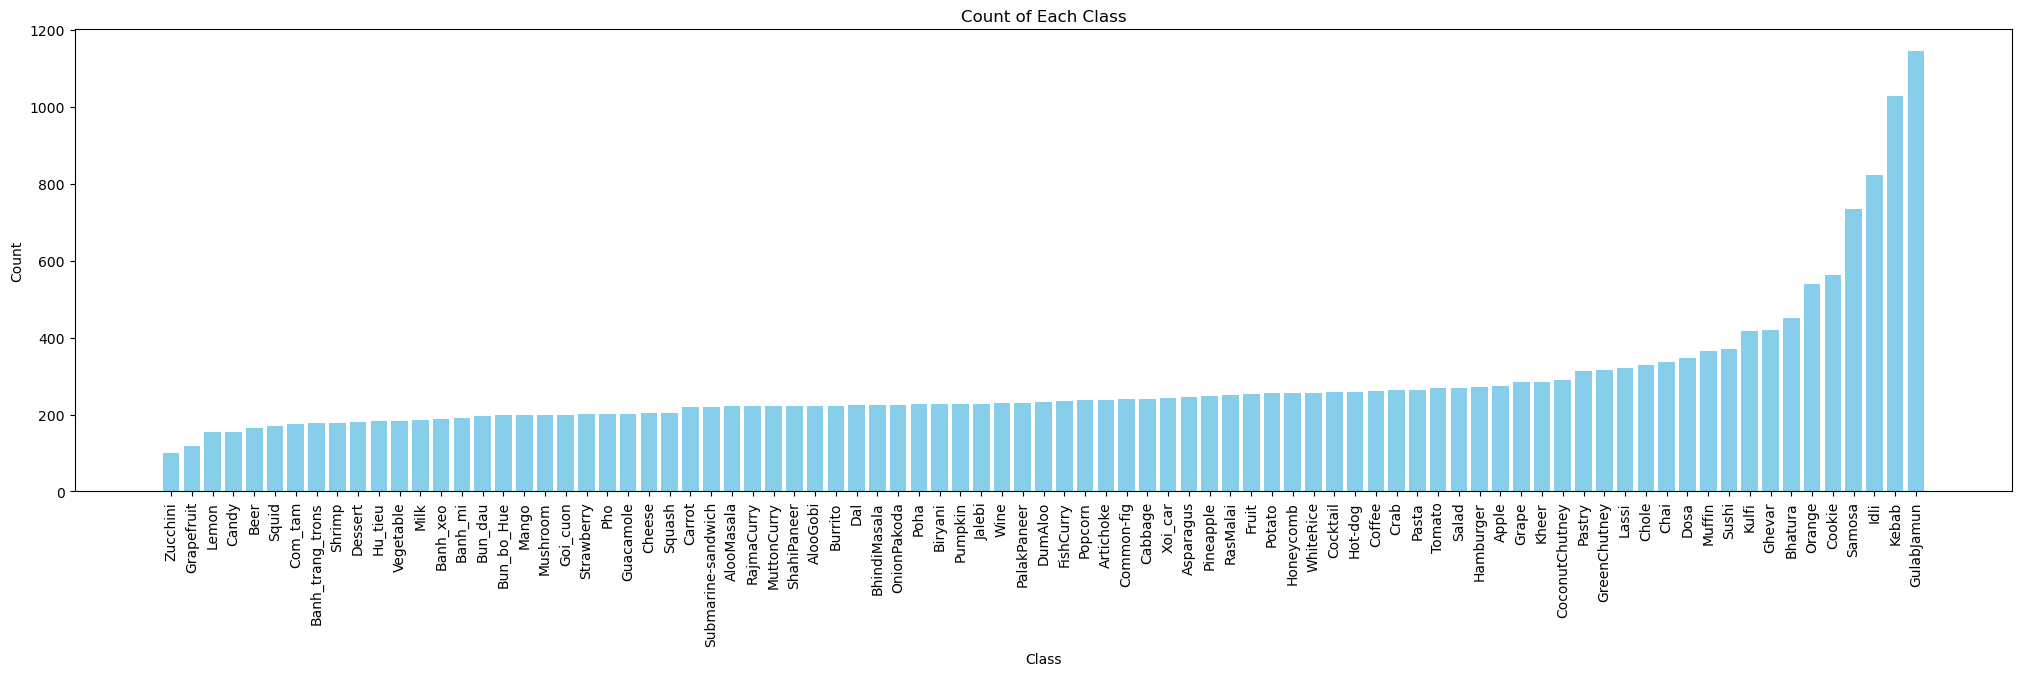

In [32]:

df=valid_df
plt.figure(figsize=(25, 6))

bars=plt.bar(df['Class'], df['Image'], color='skyblue')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.xticks(rotation=90)

plt.show()


In [40]:
# Statistical analysis of Each class count for test dataset

master_df_test=class_labels("OID_new/images/test", "OID_new/labels/test")
master_df_test.groupby(['Class']).count().describe()


,ImageFile,id,Image,Label
count,85.0,85.000000,85.000000,85.000000
mean,0.0,51.082353,51.082353,51.082353
std,0.0,38.539779,38.539779,38.539779
min,0.0,20.000000,20.000000,20.000000
25%,0.0,25.000000,25.000000,25.000000
50%,0.0,40.000000,40.000000,40.000000
75%,0.0,58.000000,58.000000,58.000000
max,0.0,219.000000,219.000000,219.000000


In [41]:
# Unique CLass count for test dataset
len(set(master_df_test.Class))


85

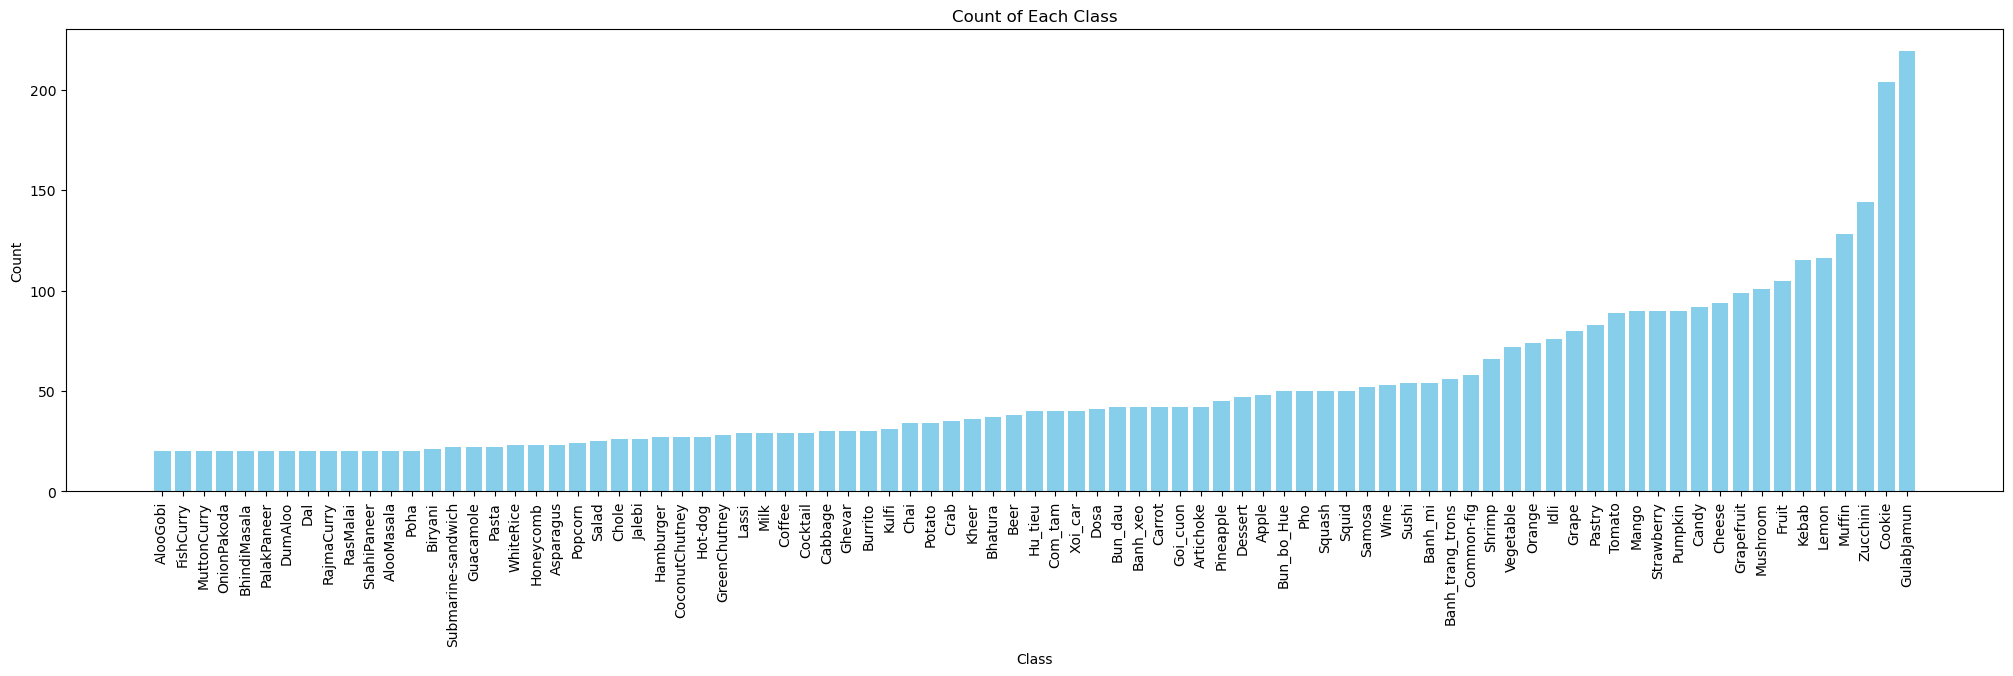

In [42]:
# Distribution of each class for test dataset

test_df= pd.DataFrame(master_df_test.groupby(['Class'])['Image'].count()).reset_index().sort_values(by=['Image'])
test_df

df=test_df
plt.figure(figsize=(25, 6))

bars=plt.bar(df['Class'], df['Image'], color='skyblue')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.xticks(rotation=90)

plt.show()


# Starting with the training with Yolo models

### Training with Yolo V5

In [ ]:
# CLoning the Yolo V5 and installing the required packages & libraries

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import pandas as pd
import torch
import utilsb
import tqdm
import cv2
import os
import torch
import utils
import shutil
import random

display = utils.notebook_init()  # checks

In [1]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 32 --epochs 300 --data "/kaggle/input/yolo-food-yaml/coco128_food.yaml" --weights yolov5s.pt --cache --project "food_recogniton_project_yolov5" --resume --device 0

python: can't open file 'c:\Users\atanu\Desktop\Food Project\train.py': [Errno 2] No such file or directory


### Training with Yolo V8

In [ ]:
# Installing the Yolo V8 and the required packages & libraries

%pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
# Train YOLOv8n on COCO8 for 300 epochs
!yolo train model=yolov8s.pt data="/kaggle/input/coco-new-good-food-v1/coco128_food.yaml" epochs=300 imgsz=640 batch=38 patience=20 augment=True